# Contents

1. Auto_insurance_fraud
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remark

# 1.Auto_insurance_fraud

# 2.Problem Definition

The dataset is provided to identify the auto insurance fraud cases.

In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [456]:
df=pd.read_csv('Auto_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [457]:
df.replace('?',np.NaN,inplace=True)

In [458]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [459]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [460]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [461]:
df['collision_type'].fillna(df['collision_type'].mode().values[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode().values[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode().values[0],inplace=True)

In [462]:
df.drop('_c39',axis=1,inplace=True)
df.drop('policy_number',axis=1, inplace=True)

In [463]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

# 3.Data Analysis (EDA)

In [366]:
df[('policy_bind_date')].value_counts()

28-04-1992    3
01-01-2006    3
05-08-1992    3
14-12-1991    2
24-06-1990    2
             ..
02-11-2012    1
27-04-2012    1
13-11-2002    1
12-12-2011    1
22-10-2011    1
Name: policy_bind_date, Length: 951, dtype: int64

In [368]:
df[('policy_state')].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

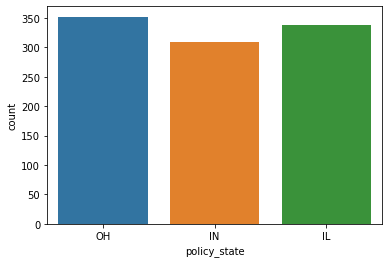

In [369]:
sns.countplot(x='policy_state',data=df)
plt.show()

In [371]:
df[('insured_sex')].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

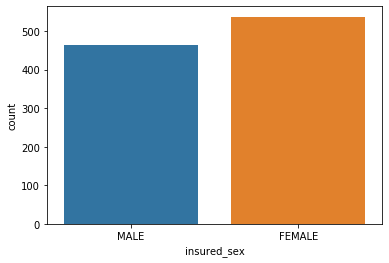

In [373]:
sns.countplot(x='insured_sex',data=df)
plt.show()

In [374]:
df[('insured_education_level')].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

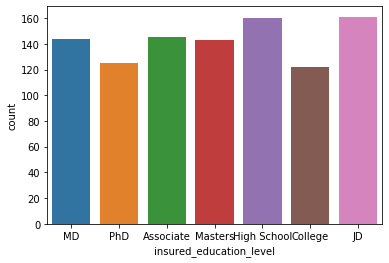

In [376]:
sns.countplot(x='insured_education_level',data=df)
plt.show()

In [377]:
df[('insured_occupation')].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

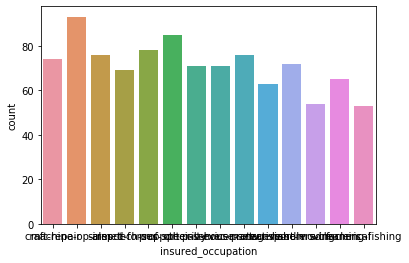

In [378]:
sns.countplot(x='insured_occupation',data=df)
plt.show()

In [482]:
df[('insured_relationship')].value_counts()

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64

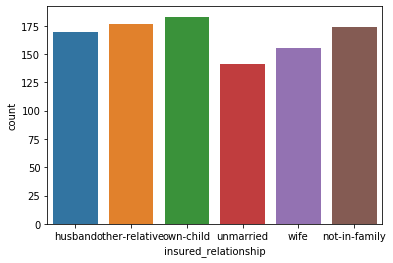

In [380]:
sns.countplot(x='insured_relationship',data=df)
plt.show()

In [381]:
df[('collision_type')].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

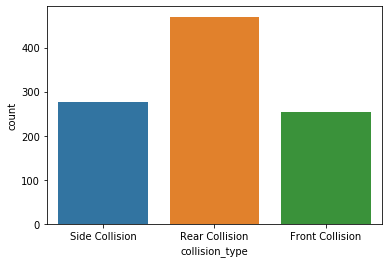

In [383]:
sns.countplot(x='collision_type',data=df)
plt.show()

In [385]:
df[('auto_model')].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
95                27
E400              27
F150              27
Grand Cherokee    25
93                25
Escape            24
Maxima            24
Tahoe             24
Ultima            23
X5                23
Silverado         22
Highlander        22
Civic             22
Fusion            21
Impreza           20
ML350             20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [271]:
df.shape

(1000, 38)

In [386]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

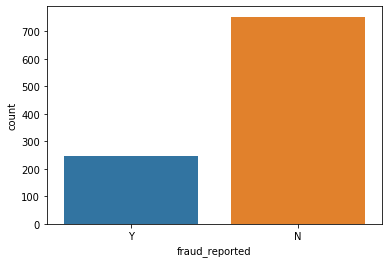

In [388]:
sns.countplot(x='fraud_reported',data=df)
plt.show()

In [389]:
#lets first convert all categorial values into numerical values

In [465]:
le = LabelEncoder()
list1 = ['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

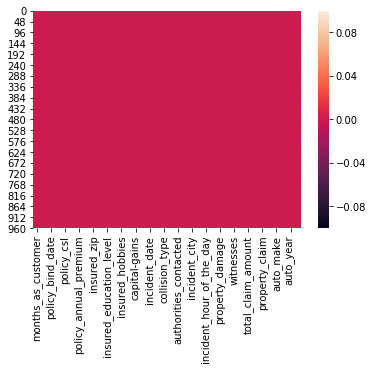

In [387]:
#lets check is there any nullvalues
sns.heatmap(df.isnull())

In [391]:
#Lets describe the data statistically
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [392]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_bind_date,0.055055,0.056538,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,...,-0.007004,-0.011563,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.039338,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


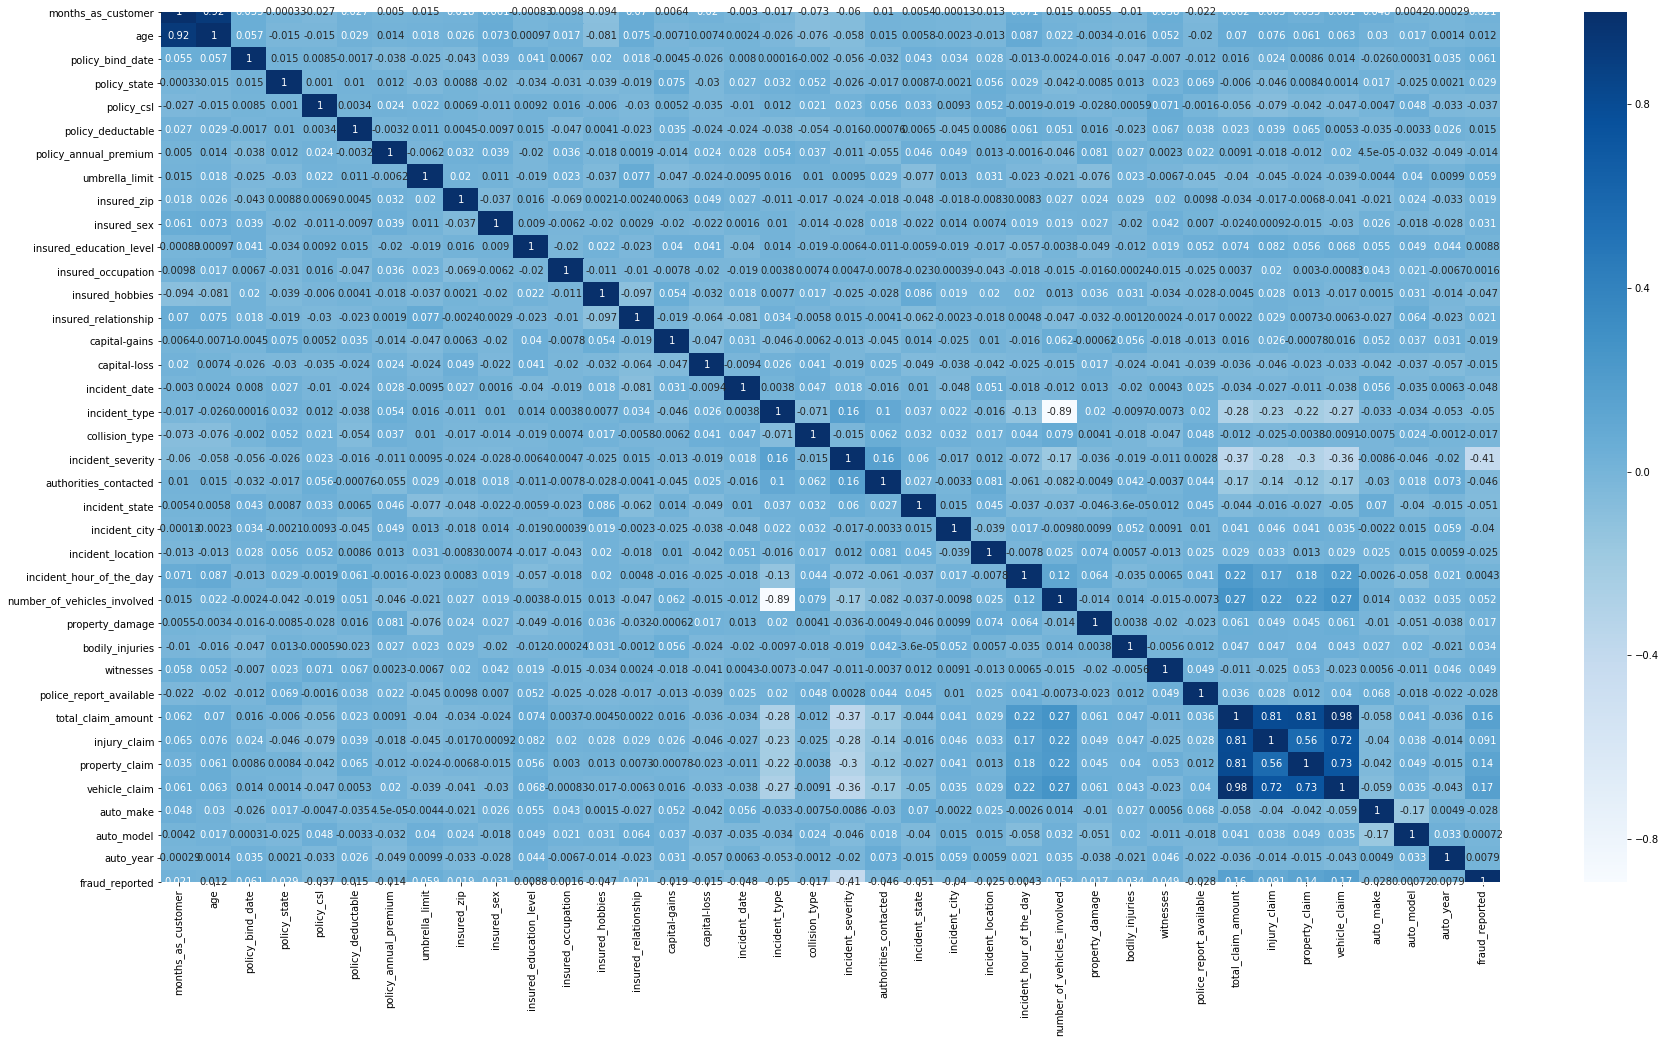

In [393]:
plt.figure(figsize = (30,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

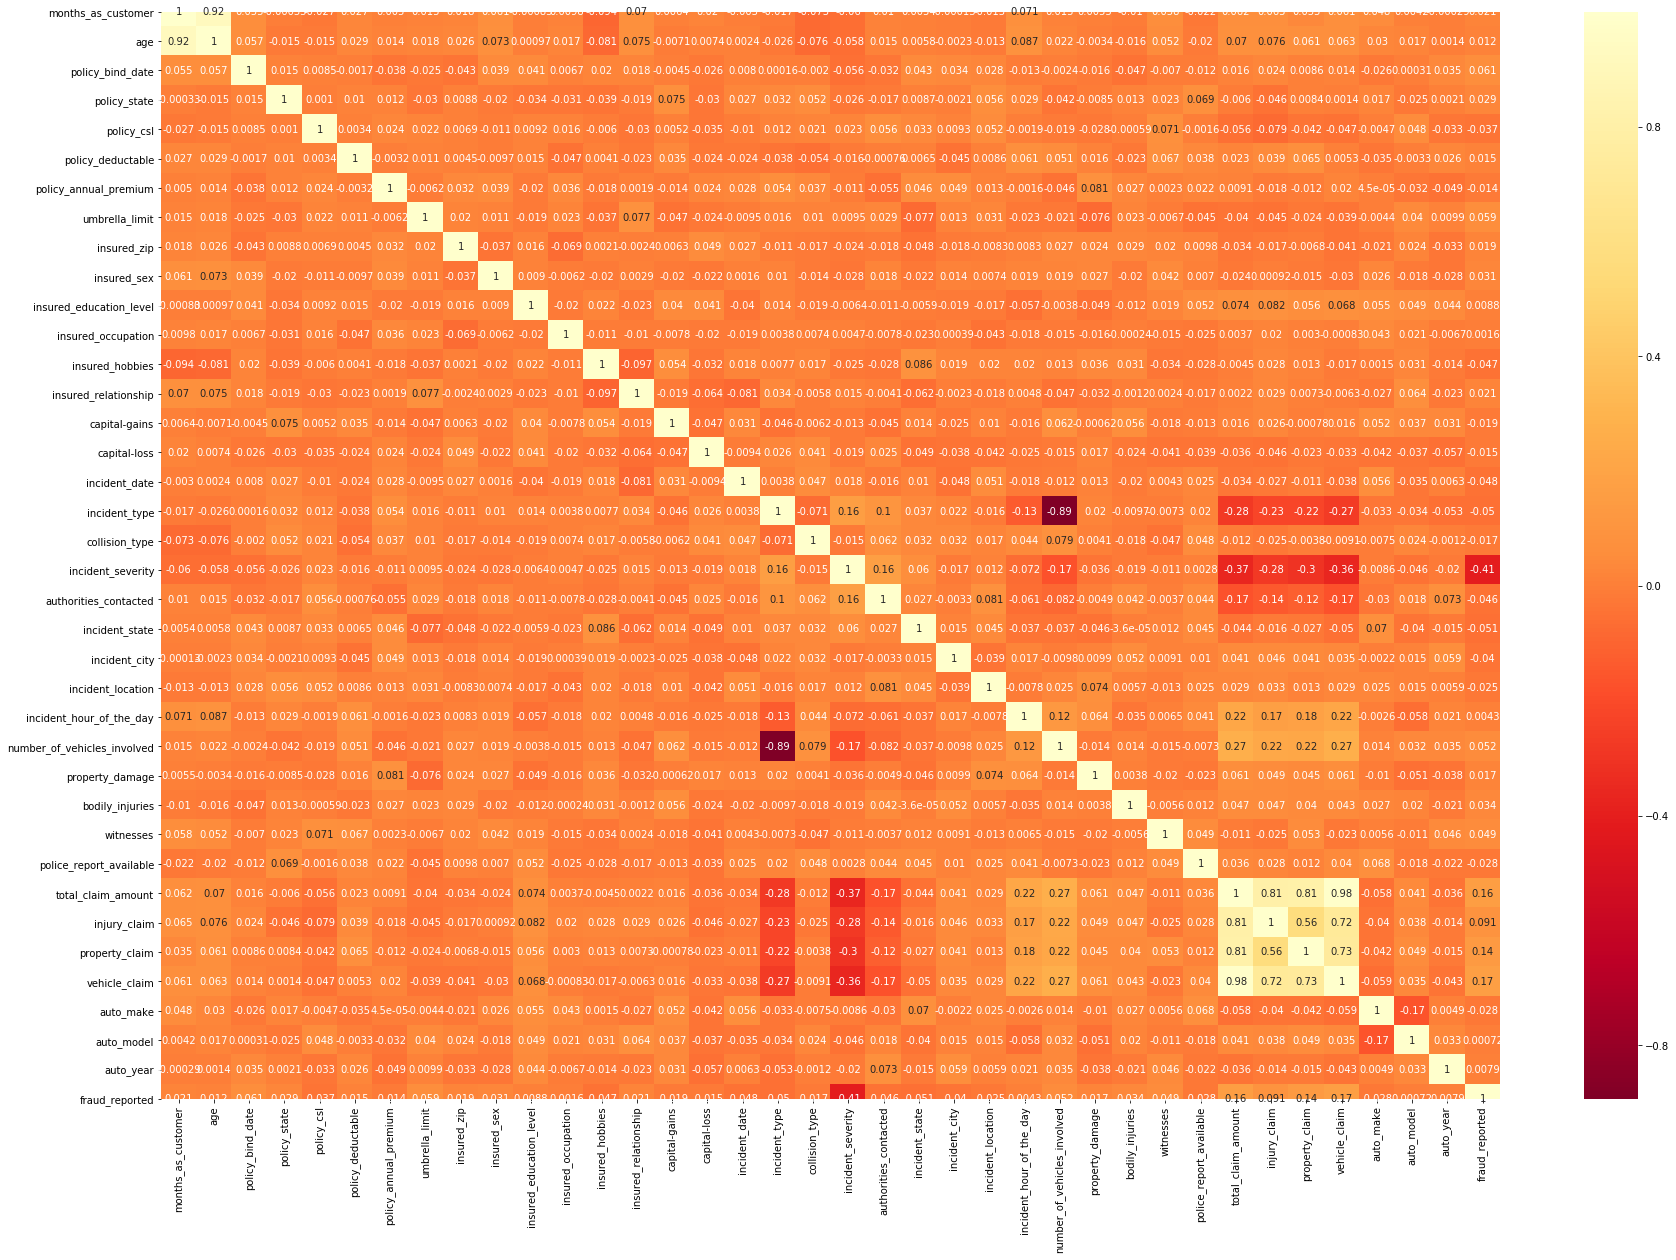

In [394]:
plt.figure(figsize = (30,20))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [467]:
df[('collision_type')].value_counts()

1    470
2    276
0    254
Name: collision_type, dtype: int64

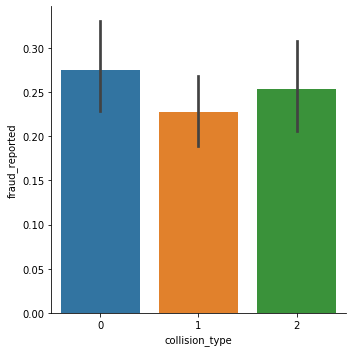

In [468]:
g=sns.catplot(x='collision_type',y='fraud_reported',data=df,kind='bar')

In [469]:
df[('policy_state')].value_counts()

2    352
0    338
1    310
Name: policy_state, dtype: int64

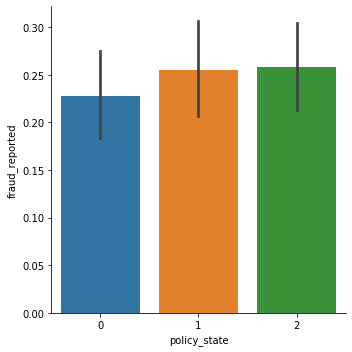

In [471]:
g=sns.catplot(x='policy_state',y='fraud_reported',data=df,kind='bar')

In [472]:
df[('insured_sex')].value_counts()

0    537
1    463
Name: insured_sex, dtype: int64

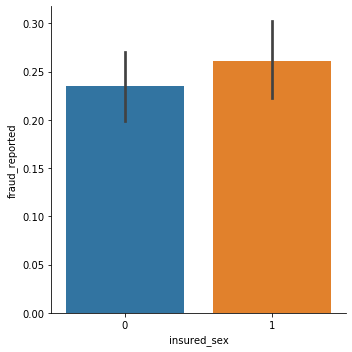

In [473]:
g=sns.catplot(x='insured_sex',y='fraud_reported',data=df,kind='bar')

In [474]:
df[('insured_education_level')].value_counts()

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64

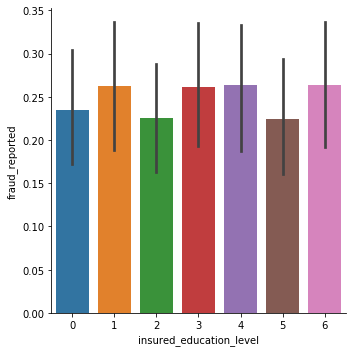

In [475]:
g=sns.catplot(x='insured_education_level',y='fraud_reported',data=df,kind='bar')

In [476]:
df[('insured_occupation')].value_counts()

6     93
9     85
12    78
11    76
3     76
2     74
13    72
8     71
7     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64

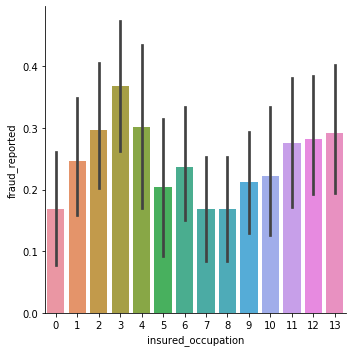

In [477]:
g=sns.catplot(x='insured_occupation',y='fraud_reported',data=df,kind='bar')

In [478]:
df[('insured_relationship')].value_counts()

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64

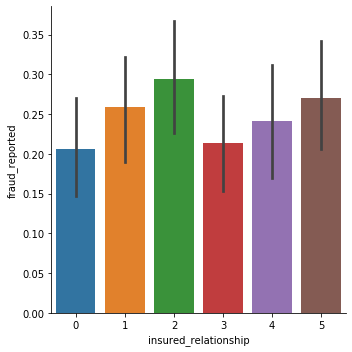

In [479]:
g=sns.catplot(x='insured_relationship',y='fraud_reported',data=df,kind='bar')

In [480]:
df[('auto_model')].value_counts()

30    43
36    42
4     37
27    37
23    36
20    35
28    33
5     32
21    32
29    31
25    30
1     28
15    28
9     28
14    27
12    27
3     27
17    25
2     25
26    24
13    24
34    24
37    23
35    23
18    22
32    22
10    22
16    21
24    20
33    20
11    20
8     20
19    20
0     18
7     18
38    16
22    15
6     13
31    12
Name: auto_model, dtype: int64

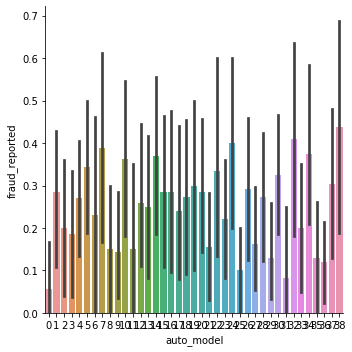

In [481]:
g=sns.catplot(x='auto_model',y='fraud_reported',data=df,kind='bar')

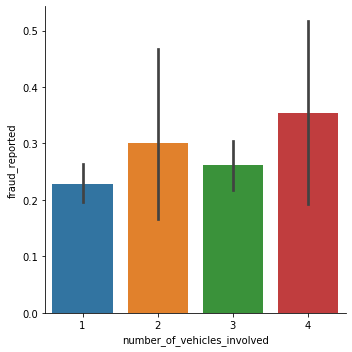

In [484]:
g=sns.catplot(x='number_of_vehicles_involved',y='fraud_reported',data=df,kind='bar')

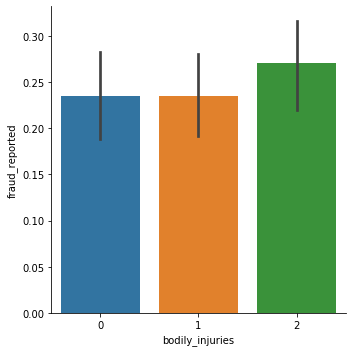

In [485]:
g=sns.catplot(x='bodily_injuries',y='fraud_reported',data=df,kind='bar')

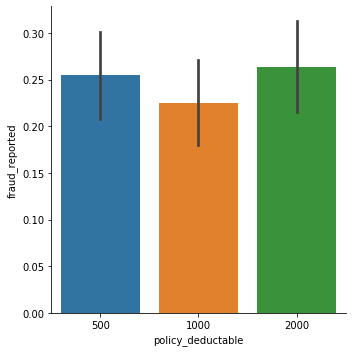

In [486]:
g=sns.catplot(x='policy_deductable',y='fraud_reported',data=df,kind='bar')

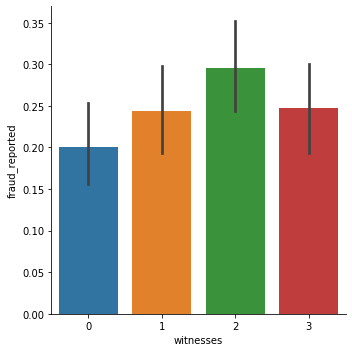

In [487]:
g=sns.catplot(x='witnesses',y='fraud_reported',data=df,kind='bar')

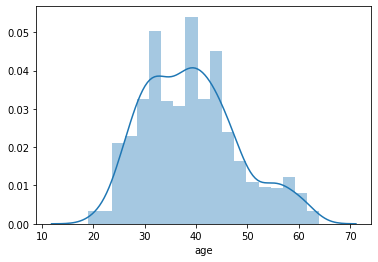

In [395]:
sns.distplot(df['age'])

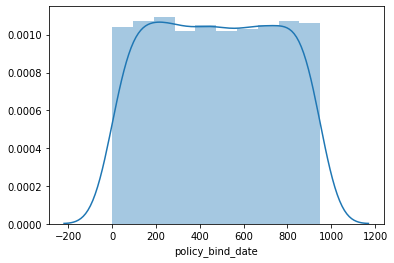

In [83]:
sns.distplot(df['policy_bind_date'])

In [85]:
df[('policy_deductable')].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

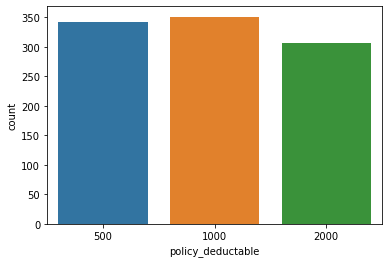

In [396]:
sns.countplot(x='policy_deductable',data=df)
plt.show()

In [397]:
df[('insured_zip')].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

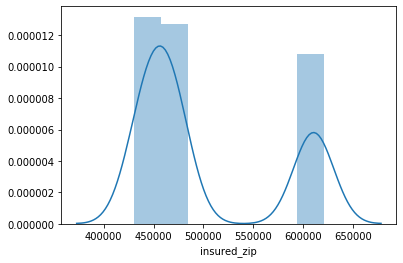

In [398]:
sns.distplot(df['insured_zip'])

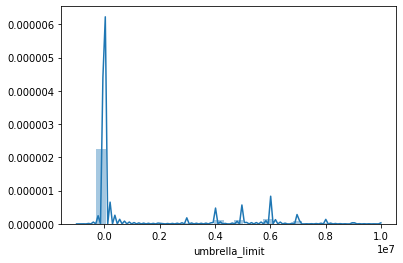

In [399]:
sns.distplot(df['umbrella_limit'])

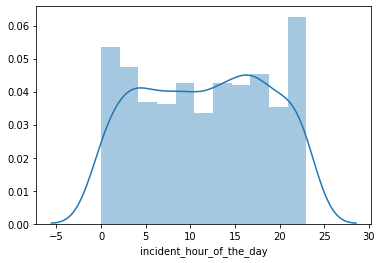

In [400]:
sns.distplot(df['incident_hour_of_the_day'])

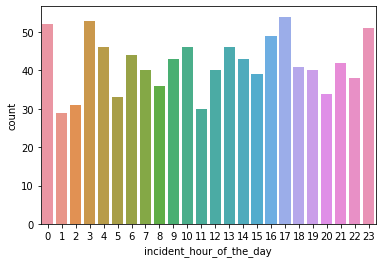

In [401]:
sns.countplot(x='incident_hour_of_the_day',data=df)
plt.show()

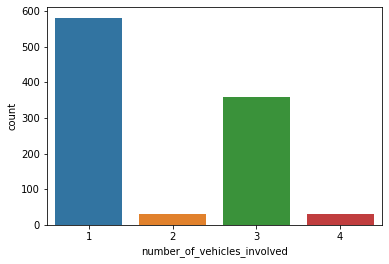

In [104]:
sns.countplot(x='number_of_vehicles_involved',data=df)
plt.show()

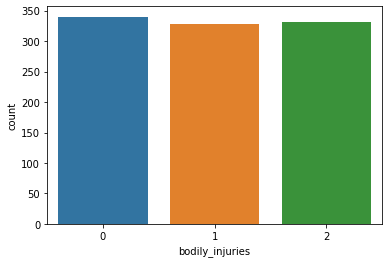

In [105]:
sns.countplot(x='bodily_injuries',data=df)
plt.show()

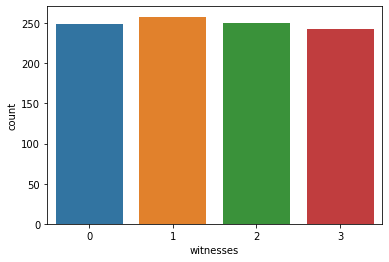

In [106]:
sns.countplot(x='witnesses',data=df)
plt.show()

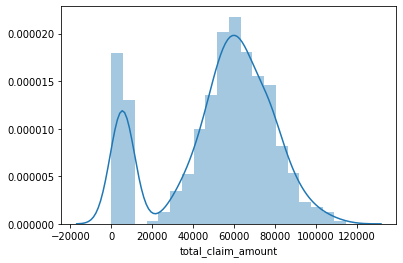

In [108]:
sns.distplot(df['total_claim_amount'])

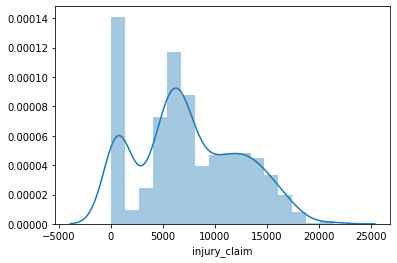

In [109]:
sns.distplot(df['injury_claim'])

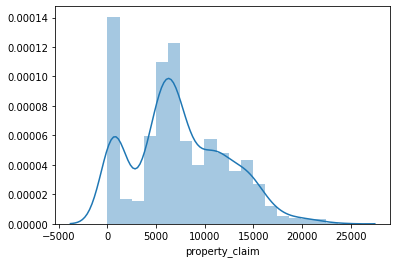

In [110]:
sns.distplot(df['property_claim'])

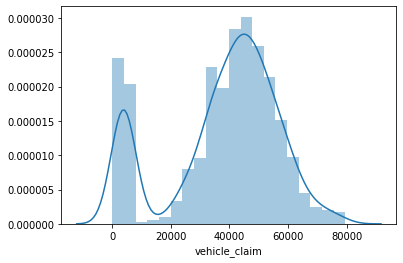

In [111]:
sns.distplot(df['vehicle_claim'])

In [403]:
#Now lets check the skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


In [404]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [405]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


In [406]:

collist=df.columns.values
ncol=15
nrows=15

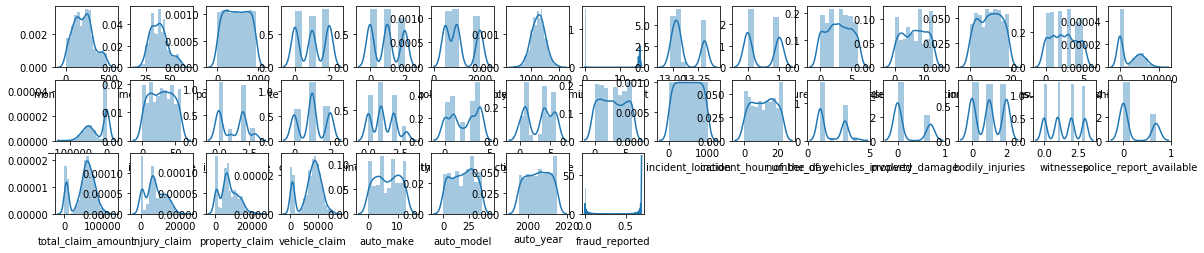

In [407]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

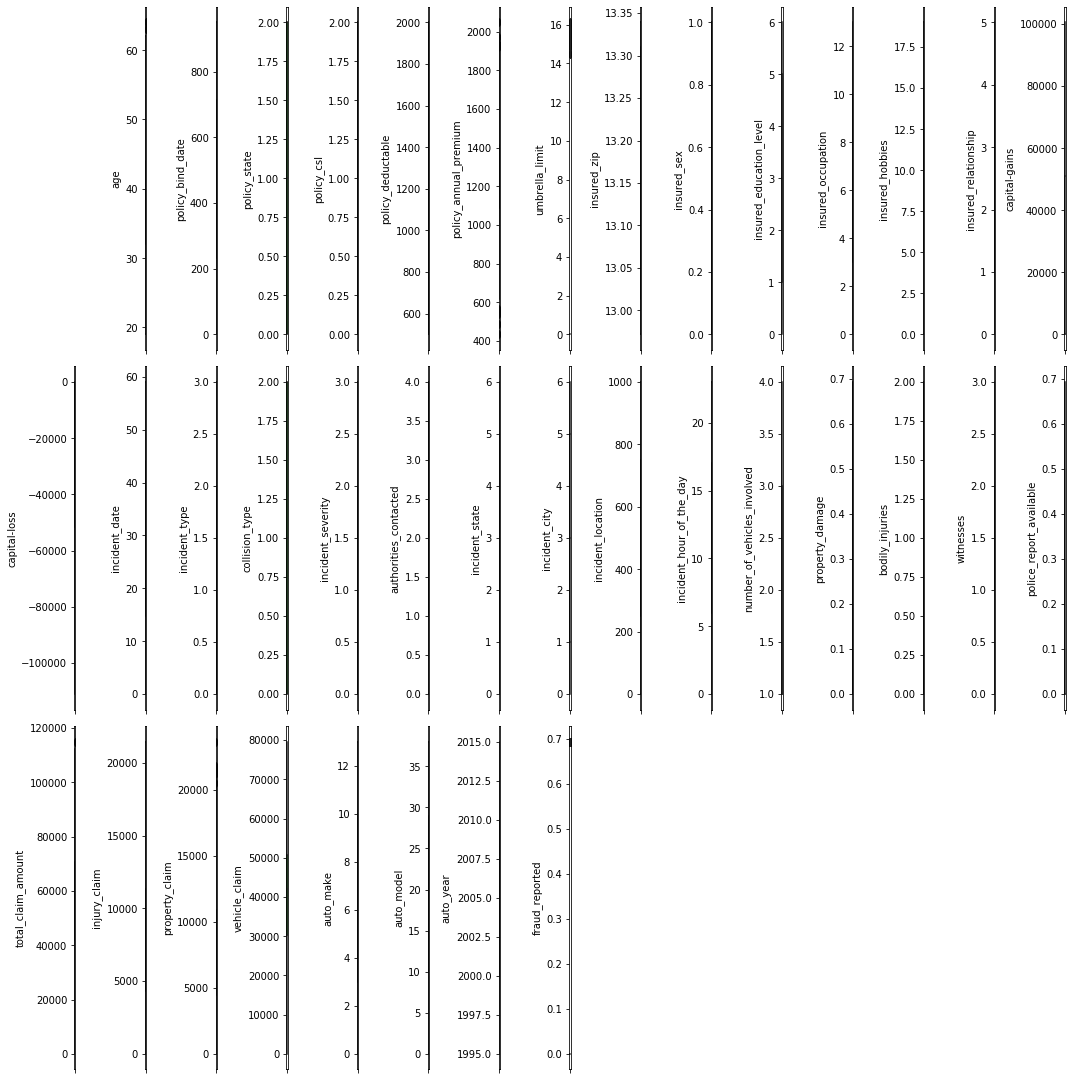

In [408]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

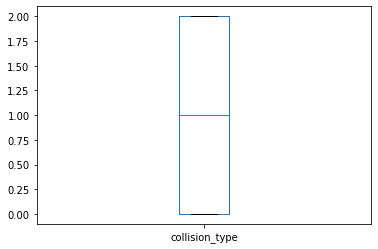

In [409]:
df['collision_type'].plot.box()

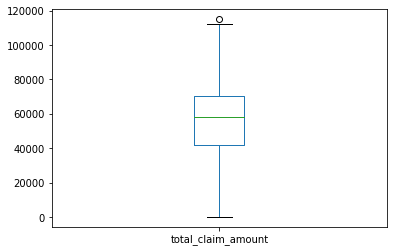

In [410]:
df['total_claim_amount'].plot.box()

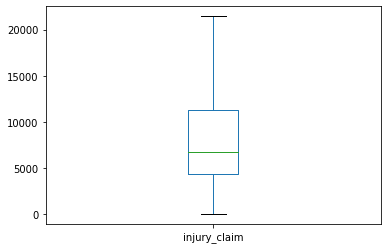

In [411]:
df['injury_claim'].plot.box()

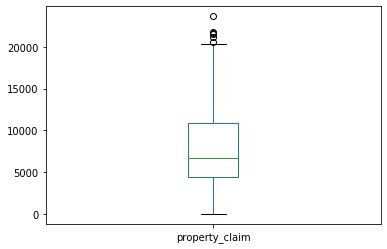

In [412]:
df['property_claim'].plot.box()

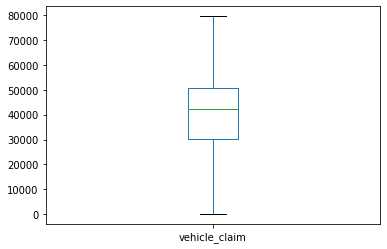

In [413]:
df['vehicle_claim'].plot.box()

# 4. Pre-processing Pipeline

In [420]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 0.20949985, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 1.25939678, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 1.04747018, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 0.12594404, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.35844716, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.41898517, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [421]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [422]:
threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 6,  6, 32,  6, 15], dtype=int64))


In [423]:
le = LabelEncoder()
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [424]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0.000000,13.052226,1,...,2,0.693147,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,15.424949,13.056602,1,...,0,0.000000,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,15.424949,12.973011,0,...,3,0.000000,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,15.607270,13.318124,0,...,2,0.000000,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,15.607270,13.322373,1,...,1,0.000000,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487,2,2,1000,1310.80,0.000000,12.974536,0,...,1,0.000000,87200,17440,8720,61040,6,6,2006,0
996,285,41,129,0,0,1000,1436.79,0.000000,13.318223,0,...,3,0.000000,108480,18080,18080,72320,13,28,2015,0
997,130,34,509,2,1,500,1383.49,14.914123,13.000869,0,...,3,0.693147,67500,7500,7500,52500,11,19,1996,0
998,458,62,573,0,2,2000,1356.92,15.424949,12.998420,1,...,1,0.693147,46980,5220,5220,36540,1,5,1998,0


In [425]:
df.shape

(1000, 38)

In [426]:
df_new.shape

(995, 38)

In [297]:
#Now lets train and test our data. Here our target variable is y i.e Loan_Status, and our input variables is x

In [427]:
df1=df_new.iloc[:,0:-1]

In [428]:
x=df1

In [429]:
x.shape

(995, 37)

In [430]:
y=df_new[['fraud_reported']]

In [431]:
y.shape

(995, 1)

In [ ]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [432]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [433]:
from sklearn.decomposition import PCA

In [434]:
pca = PCA(n_components = 20)

In [435]:
x = pca.fit_transform(x)

In [436]:
x.shape

(995, 20)

In [437]:
df2=pd.DataFrame(data = x)

In [438]:
df2.shape

(995, 20)

In [439]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [311]:
x_train.shape

(666, 20)

In [312]:
y_train.shape

(666, 1)

In [313]:
y_test.shape

(329, 1)

In [314]:
x_test.shape

(329, 20)

# 5.Building Machine Learning Model

In [440]:
lg = LogisticRegression()
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy_score: 0.7446808510638298
[[236   9]
 [ 75   9]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       245
           1       0.50      0.11      0.18        84

    accuracy                           0.74       329
   macro avg       0.63      0.54      0.51       329
we

In [441]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7416413373860182
[[227  18]
 [ 67  17]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       245
           1       0.49      0.20      0.29        84

    accuracy                           0.74       329
   macro avg       0.63      0.56      0.56       329
weighted avg       0.70      0.74      0.70       329



In [333]:
#doing gridsearch to find best parameter

In [451]:
#Grid Search for Algorithm Tuning

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

dataset = df
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)


0.7527638190954774
linear
{'C': 1, 'kernel': 'linear'}


In [335]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini','entropy']
}

#gridk = {'kernel' :['linear','rbf','ploy']}
gd_sr = GridSearchCV(estimator=dtc,
                    param_grid=grid_param,
                    scoring='accuracy')
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.6341708542713568


In [336]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
param_grid ={
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}


gd_sr = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
0.7326633165829146


In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
0.75678391959799


In [442]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',C=1)
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 0.7446808510638298
[[245   0]
 [ 84   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       245
           1       0.00      0.00      0.00        84

    accuracy                           0.74       329
   macro avg       0.37      0.50      0.43       329
weighted avg       0.55      0.74      0.64       329



In [443]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=4,weights='uniform',algorithm='auto')
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.7416413373860182
[[236   9]
 [ 76   8]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       245
           1       0.47      0.10      0.16        84

    accuracy                           0.74       329
   macro avg       0.61      0.53      0.50       329
weighted avg       0.68      0.74      0.67       329



In [444]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='gini')
dct.fit(x_train,y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.668693009118541
[[197  48]
 [ 61  23]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       245
           1       0.32      0.27      0.30        84

    accuracy                           0.67       329
   macro avg       0.54      0.54      0.54       329
weighted avg       0.65      0.67      0.66       329



In [445]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_features ='log2',max_depth = 8,criterion='entropy')

rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
predrf

print('predicted',predrf)
print('actual',y_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

predicted [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual      fraud_reported
925               0
528               0
570               0
660               0
636               0
..              ...
313               0
606               0
434               0
0                 1
318               0

[329 rows x 1 columns]
0.7507598784194529
[[245   0]
 [ 82   2]]
         

In [342]:
#Cross Validating to avoid overfitting and under fitting of the model.

In [446]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.725      0.72864322 0.71356784 0.76884422 0.73737374]
0.7346858027511294
0.018709989579543684


In [447]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75       0.75376884 0.75376884 0.75376884 0.75252525]
0.7527663570377138
0.0014646367675729146


In [345]:
#svc model is suffering from overfitting and underfitting

In [448]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(Knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75       0.72361809 0.71356784 0.72864322 0.72727273]
0.7286203746002741
0.011920626880162419


In [449]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(dct,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.635      0.64321608 0.62311558 0.66834171 0.64141414]
0.6422175016496625
0.014839761146241874


In [450]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75       0.75376884 0.75376884 0.75376884 0.75252525]
0.7527663570377138
0.0014646367675729146


In [350]:
#we will save gnb model as it not suffering from overfiting or underfitting.

In [452]:
from sklearn.externals import joblib
joblib.dump(Knn,'Knnautoinsurancefraud.obj')
Knn_from_joblib = joblib.load('Knnautoinsurancefraud.obj')
Knn_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,